# Quantum Tower Defense - Full Interactive Demo

## Complete Game Visualization with Matplotlib

This notebook provides an interactive visualization of the game mechanics.

In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

from quantum_engine.quantum_state import QuantumStateManager
from quantum_engine.enemy_superposition import EnemySpawner

# Enable interactive plotting
%matplotlib inline

print("✅ Modules loaded successfully!")

✅ Modules loaded successfully!


## 1. Game Board Setup

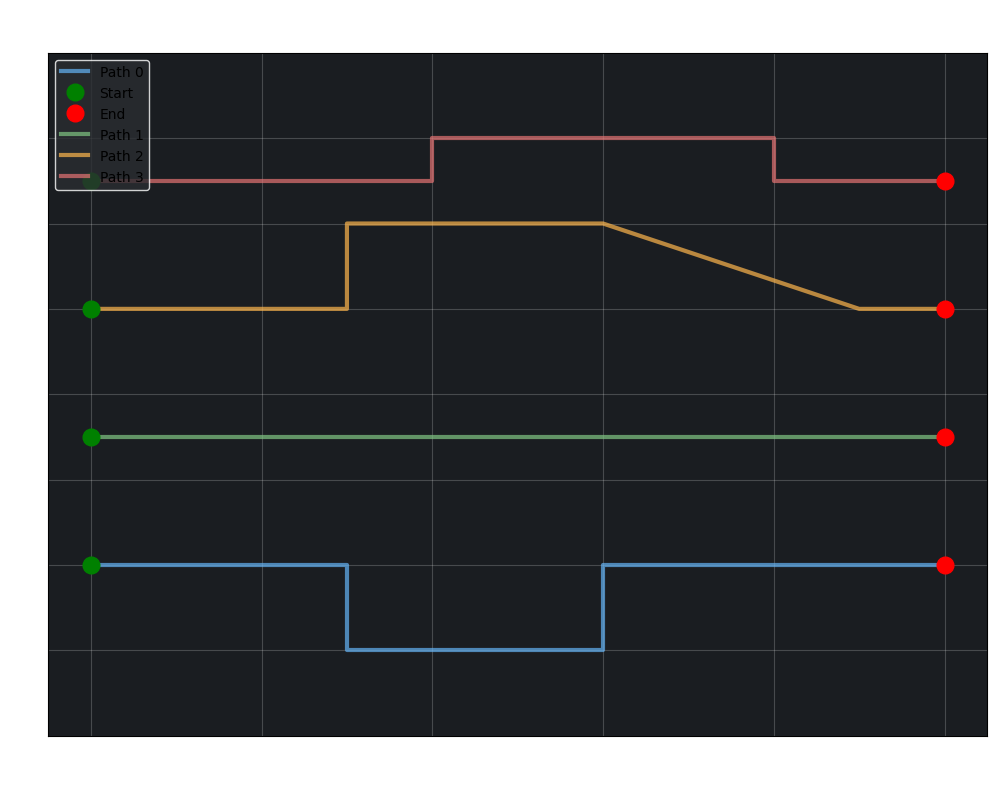


🗺️ Game board with 4 quantum paths


In [2]:
# Define 4 paths
paths = [
    [(0, 2), (3, 2), (3, 1), (6, 1), (6, 2), (10, 2)],  # Path 0
    [(0, 3.5), (2, 3.5), (4, 3.5), (6, 3.5), (8, 3.5), (10, 3.5)],  # Path 1
    [(0, 5), (3, 5), (3, 6), (6, 6), (9, 5), (10, 5)],  # Path 2
    [(0, 6.5), (4, 6.5), (4, 7), (8, 7), (8, 6.5), (10, 6.5)],  # Path 3
]

# Plot game board
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(-0.5, 10.5)
ax.set_ylim(0, 8)
ax.set_aspect('equal')
ax.set_facecolor('#1a1d21')
ax.grid(True, alpha=0.2, color='white')
ax.set_title('Quantum Tower Defense - Game Board', fontsize=16, color='white', pad=20)

# Draw paths
colors = ['#64B4F6', '#81C784', '#FFB74D', '#E57373']
for i, path in enumerate(paths):
    x_coords = [p[0] for p in path]
    y_coords = [p[1] for p in path]
    ax.plot(x_coords, y_coords, color=colors[i], linewidth=3, label=f'Path {i}', alpha=0.7)
    
    # Mark start and end
    ax.plot(path[0][0], path[0][1], 'go', markersize=12, label='Start' if i == 0 else '')
    ax.plot(path[-1][0], path[-1][1], 'ro', markersize=12, label='End' if i == 0 else '')

ax.legend(loc='upper left', facecolor='#2a2d31', edgecolor='white')
ax.set_xlabel('X Position', color='white')
ax.set_ylabel('Y Position', color='white')
ax.tick_params(colors='white')

plt.tight_layout()
plt.show()

print("\n🗺️ Game board with 4 quantum paths")

## 2. Visualize Enemy in Superposition

C:\Users\NAYANANSHU GARAI\AppData\Local\Temp\ipykernel_85572\3658185515.py:45: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = patches.Circle((x, y), 0.15, color=colors[i], alpha=alpha, edgecolor='white', linewidth=2)


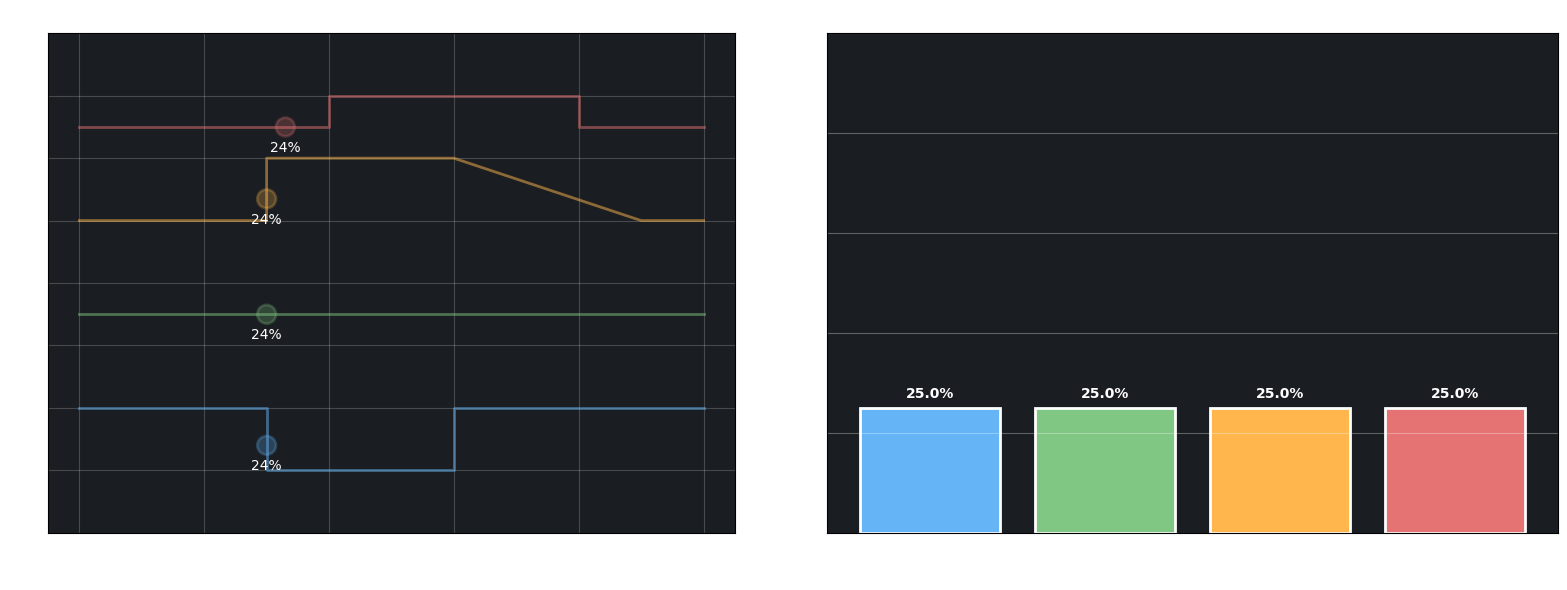


👻 Enemy exists on all 4 paths simultaneously in superposition!


In [3]:
# Initialize quantum system
qsm = QuantumStateManager(num_paths=4)
spawner = EnemySpawner(qsm)

# Spawn enemy
enemy = spawner.spawn_single_enemy(health=100, speed=0.05, current_time=0.0)
enemy.position_progress = 0.3  # 30% along path

# Get probabilities
probs = qsm.get_path_probabilities(enemy.quantum_circuit)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left: Enemy on paths
ax1.set_xlim(-0.5, 10.5)
ax1.set_ylim(0, 8)
ax1.set_aspect('equal')
ax1.set_facecolor('#1a1d21')
ax1.grid(True, alpha=0.2, color='white')
ax1.set_title('Enemy in Quantum Superposition', fontsize=14, color='white')

# Draw paths
for i, path in enumerate(paths):
    x_coords = [p[0] for p in path]
    y_coords = [p[1] for p in path]
    ax1.plot(x_coords, y_coords, color=colors[i], linewidth=2, alpha=0.5)
    
    # Draw enemy at progress point with probability-based transparency
    total_length = sum(np.sqrt((path[j+1][0]-path[j][0])**2 + (path[j+1][1]-path[j][1])**2) 
                      for j in range(len(path)-1))
    target_dist = enemy.position_progress * total_length
    
    # Find position
    current_dist = 0
    for j in range(len(path)-1):
        segment_length = np.sqrt((path[j+1][0]-path[j][0])**2 + (path[j+1][1]-path[j][1])**2)
        if current_dist + segment_length >= target_dist:
            ratio = (target_dist - current_dist) / segment_length
            x = path[j][0] + ratio * (path[j+1][0] - path[j][0])
            y = path[j][1] + ratio * (path[j+1][1] - path[j][1])
            
            # Draw enemy with alpha based on probability
            alpha = probs[i]
            circle = patches.Circle((x, y), 0.15, color=colors[i], alpha=alpha, edgecolor='white', linewidth=2)
            ax1.add_patch(circle)
            ax1.text(x, y-0.4, f"{int(probs[i]*100)}%", ha='center', color='white', fontsize=10)
            break
        current_dist += segment_length

ax1.set_xlabel('X Position', color='white')
ax1.set_ylabel('Y Position', color='white')
ax1.tick_params(colors='white')

# Right: Probability distribution
ax2.bar(range(4), probs, color=colors, edgecolor='white', linewidth=2)
ax2.set_xlabel('Path Number', fontsize=12, color='white')
ax2.set_ylabel('Probability', fontsize=12, color='white')
ax2.set_title('Quantum State Probability Distribution', fontsize=14, color='white')
ax2.set_ylim(0, 1)
ax2.set_facecolor('#1a1d21')
ax2.grid(axis='y', alpha=0.3, color='white')
ax2.tick_params(colors='white')

for i, prob in enumerate(probs):
    ax2.text(i, prob + 0.02, f'{prob*100:.1f}%', ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n👻 Enemy exists on all 4 paths simultaneously in superposition!")

## 3. Measurement Tower Effect

🔭 Measurement Tower activated!
✨ Enemy collapsed to Path 3



C:\Users\NAYANANSHU GARAI\AppData\Local\Temp\ipykernel_85572\2070161632.py:37: UserWarning: Glyph 128123 (\N{GHOST}) missing from current font.
  plt.tight_layout()
C:\Users\NAYANANSHU GARAI\AppData\Local\Temp\ipykernel_85572\2070161632.py:37: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
c:\Users\NAYANANSHU GARAI\quantum-tower-defense\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128123 (\N{GHOST}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\NAYANANSHU GARAI\quantum-tower-defense\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


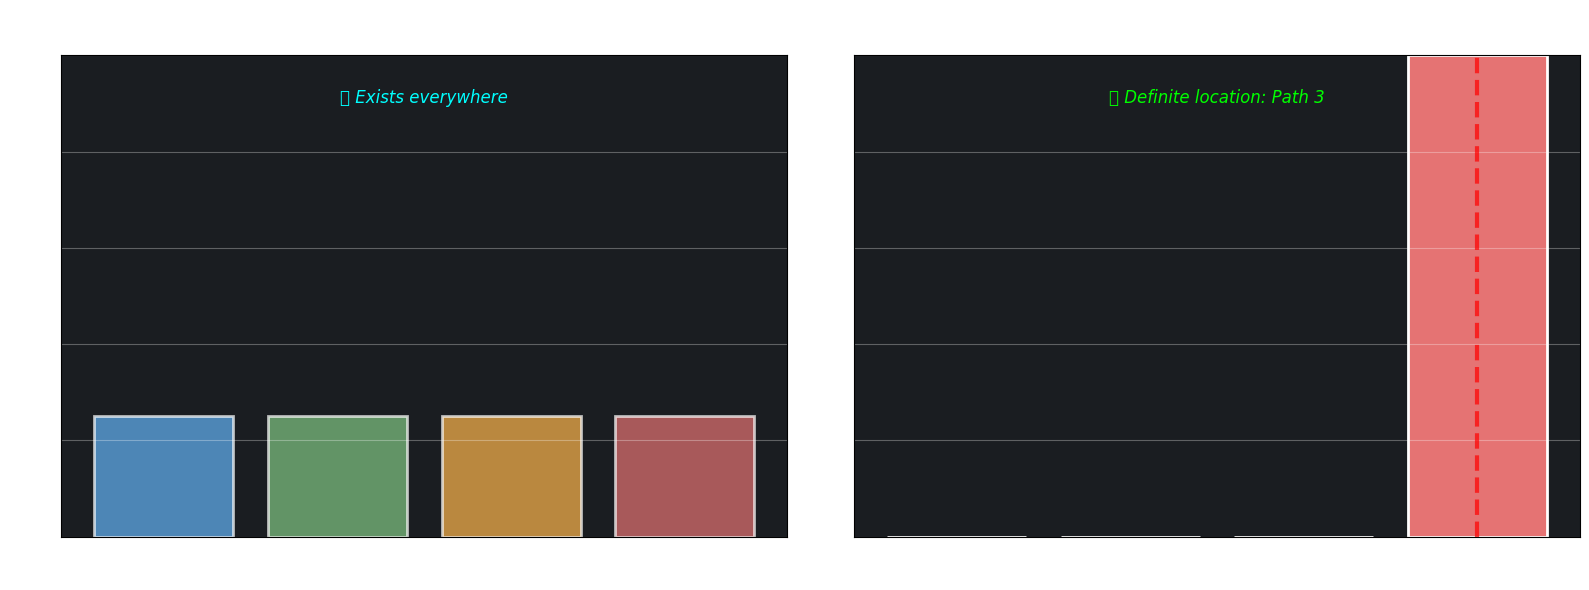

📊 Wave function collapse visualized!
   Now towers can deal full damage to the enemy.


In [4]:
# Measure the enemy
measured_path = qsm.measure_path(enemy.quantum_circuit)
enemy.collapse_to_path(measured_path)

print(f"🔭 Measurement Tower activated!")
print(f"✨ Enemy collapsed to Path {measured_path}\n")

# Plot before and after
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Before (superposition)
ax1.bar(range(4), probs, color=colors, edgecolor='white', linewidth=2, alpha=0.7)
ax1.set_title('BEFORE Measurement\n(Superposition)', fontsize=14, color='white', fontweight='bold')
ax1.set_xlabel('Path', color='white')
ax1.set_ylabel('Probability', color='white')
ax1.set_ylim(0, 1)
ax1.set_facecolor('#1a1d21')
ax1.grid(axis='y', alpha=0.3, color='white')
ax1.tick_params(colors='white')
ax1.text(0.5, 0.9, '👻 Exists everywhere', transform=ax1.transAxes, 
         ha='center', color='cyan', fontsize=12, style='italic')

# After (collapsed)
probs_after = [1.0 if i == measured_path else 0.0 for i in range(4)]
ax2.bar(range(4), probs_after, color=colors, edgecolor='white', linewidth=2)
ax2.set_title('AFTER Measurement\n(Collapsed)', fontsize=14, color='white', fontweight='bold')
ax2.set_xlabel('Path', color='white')
ax2.set_ylabel('Probability', color='white')
ax2.set_ylim(0, 1)
ax2.set_facecolor('#1a1d21')
ax2.grid(axis='y', alpha=0.3, color='white')
ax2.tick_params(colors='white')
ax2.axvline(measured_path, color='red', linestyle='--', linewidth=3, alpha=0.7)
ax2.text(0.5, 0.9, f'🎯 Definite location: Path {measured_path}', transform=ax2.transAxes,
         ha='center', color='lime', fontsize=12, style='italic')

plt.tight_layout()
plt.show()

print("📊 Wave function collapse visualized!")
print("   Now towers can deal full damage to the enemy.")

## 4. Phase Tower Probability Manipulation

🌀 Phase Tower targeting Path 3



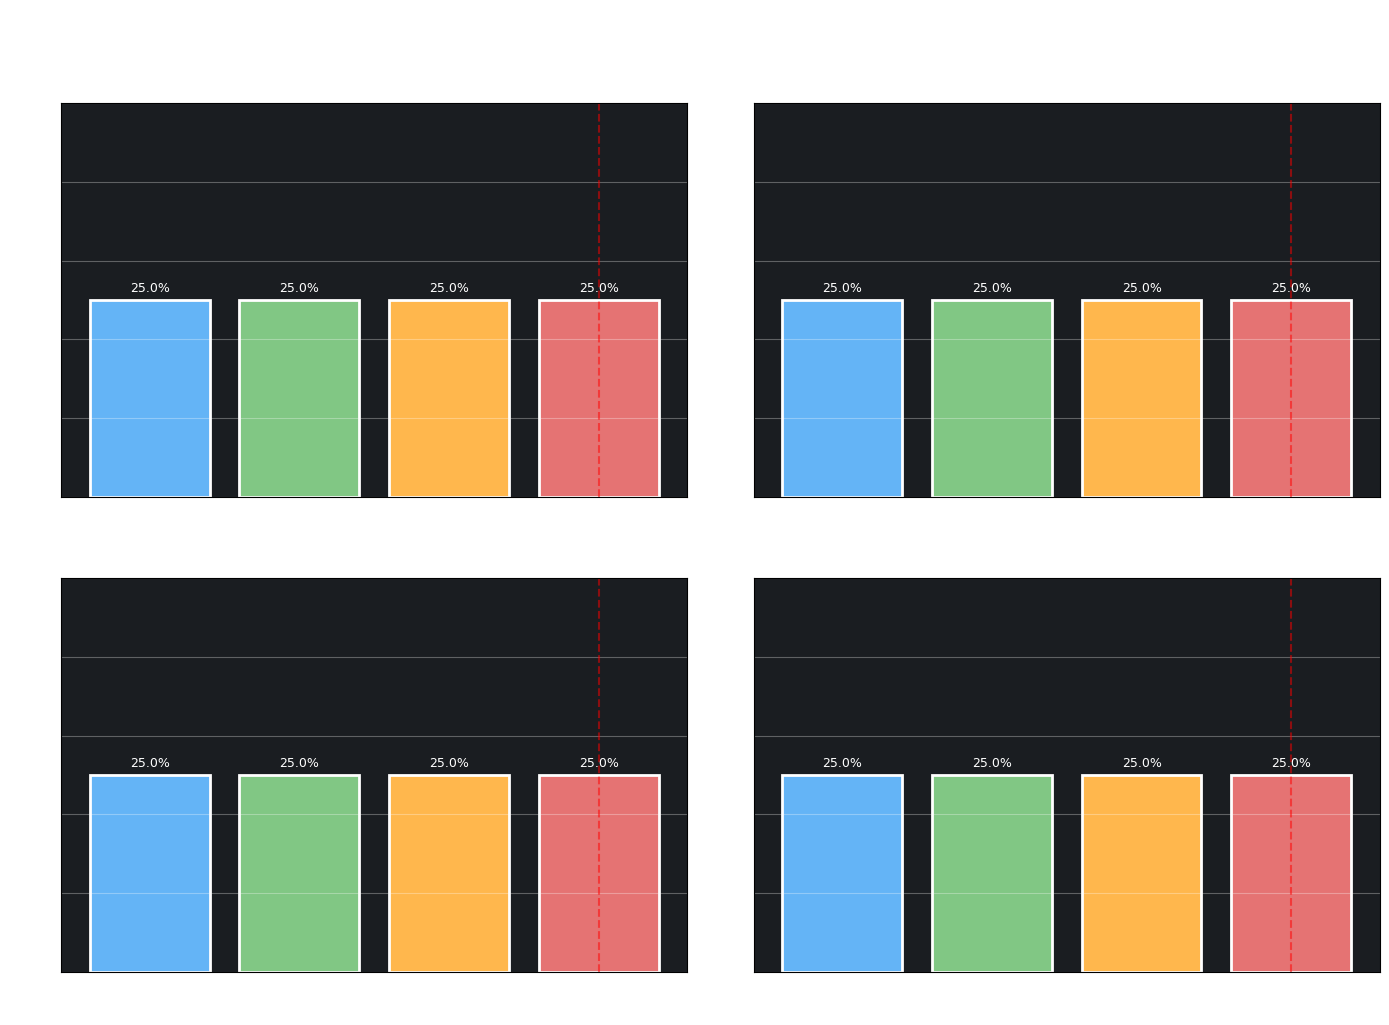


✨ Phase gates manipulate probability distributions!
   Path 3 probability decreases with stronger phase shifts.


In [5]:
# Spawn new enemy for phase test
enemy_phase = spawner.spawn_single_enemy(health=100, speed=0.05, current_time=0.0)
probs_initial = qsm.get_path_probabilities(enemy_phase.quantum_circuit)

# Apply multiple phase shifts
target_path = 3
print(f"🌀 Phase Tower targeting Path {target_path}\n")

phases = [0, np.pi/4, np.pi/2, np.pi]
all_probs = [probs_initial]

for phase in phases[1:]:
    enemy_temp = spawner.spawn_single_enemy(health=100, speed=0.05, current_time=0.0)
    enemy_temp.quantum_circuit = qsm.apply_phase_gate(
        enemy_temp.quantum_circuit,
        target_path,
        phase
    )
    probs = qsm.get_path_probabilities(enemy_temp.quantum_circuit)
    all_probs.append(probs)

# Plot evolution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

titles = ['No Phase', 'Phase π/4', 'Phase π/2', 'Phase π']

for idx, (ax, probs, title) in enumerate(zip(axes, all_probs, titles)):
    ax.bar(range(4), probs, color=colors, edgecolor='white', linewidth=2)
    ax.set_title(title, fontsize=14, color='white', fontweight='bold')
    ax.set_xlabel('Path', color='white')
    ax.set_ylabel('Probability', color='white')
    ax.set_ylim(0, 0.5)
    ax.set_facecolor('#1a1d21')
    ax.grid(axis='y', alpha=0.3, color='white')
    ax.tick_params(colors='white')
    ax.axvline(target_path, color='red', linestyle='--', alpha=0.5)
    
    # Show percentage
    for i, prob in enumerate(probs):
        ax.text(i, prob + 0.01, f'{prob*100:.1f}%', ha='center', color='white', fontsize=9)

plt.suptitle(f'Phase Tower Effect on Path {target_path}', fontsize=16, color='white', fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n✨ Phase gates manipulate probability distributions!")
print(f"   Path {target_path} probability decreases with stronger phase shifts.")

## 5. Entangled Enemy Pairs Visualization

🔗 Entangled Enemy Pair

Enemy A (ID: 5)
Enemy B (ID: 6)
Entanglement partner: 6 ↔ 5



C:\Users\NAYANANSHU GARAI\AppData\Local\Temp\ipykernel_85572\3196886861.py:54: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from current font.
  plt.tight_layout()
c:\Users\NAYANANSHU GARAI\quantum-tower-defense\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


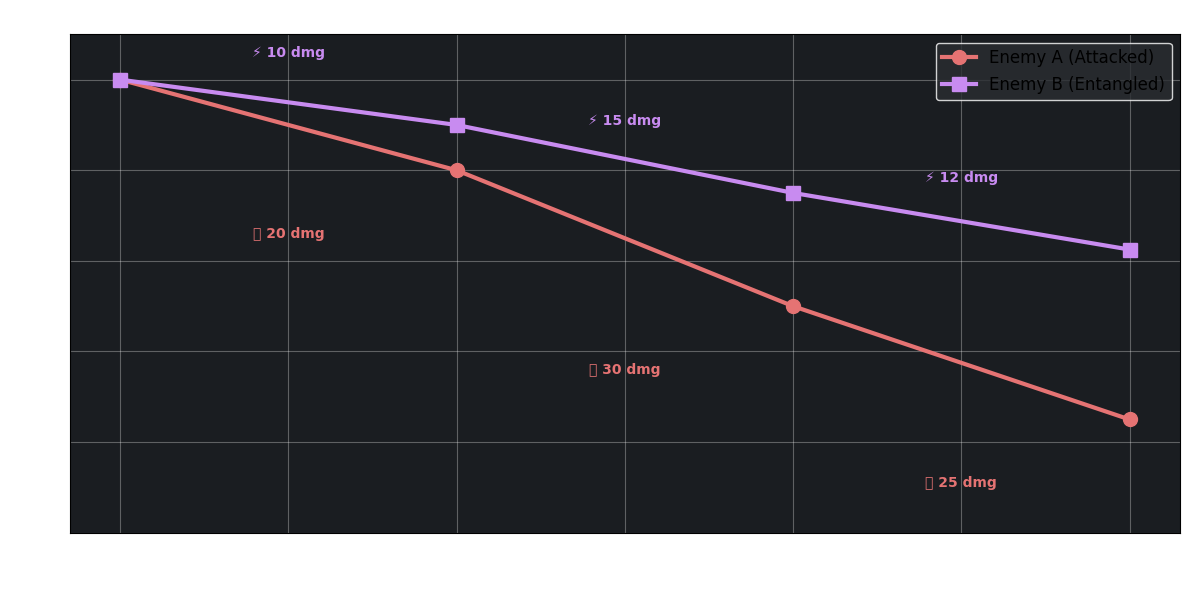


⚡ Entanglement in action!
   Damage to Enemy A propagates to Enemy B (50% correlation)
   Final: Enemy A = 25 HP, Enemy B = 62.5 HP


In [6]:
# Spawn entangled pair
pair = spawner.spawn_entangled_pair(health=100, speed=0.05, current_time=0.0)

print("🔗 Entangled Enemy Pair\n")
print(f"Enemy A (ID: {pair.enemy1.enemy_id})")
print(f"Enemy B (ID: {pair.enemy2.enemy_id})")
print(f"Entanglement partner: {pair.enemy1.entangled_partner_id} ↔ {pair.enemy2.entangled_partner_id}\n")

# Simulate damage
initial_health_A = pair.enemy1.health
initial_health_B = pair.enemy2.health

damage_sequence = [20, 30, 25]
health_history_A = [initial_health_A]
health_history_B = [initial_health_B]

for damage in damage_sequence:
    # Damage enemy A
    actual_damage = pair.enemy1.take_damage(damage)
    
    # Propagate to enemy B
    propagated = pair.propagate_damage(pair.enemy1, actual_damage)
    
    health_history_A.append(pair.enemy1.health)
    health_history_B.append(pair.enemy2.health)

# Plot health over time
fig, ax = plt.subplots(figsize=(12, 6))

turns = range(len(health_history_A))
ax.plot(turns, health_history_A, 'o-', color='#E57373', linewidth=3, markersize=10, label='Enemy A (Attacked)')
ax.plot(turns, health_history_B, 's-', color='#C88BF0', linewidth=3, markersize=10, label='Enemy B (Entangled)')

# Add damage annotations
for i, damage in enumerate(damage_sequence):
    ax.annotate(f'💥 {damage} dmg', xy=(i+0.5, health_history_A[i+1]), 
                xytext=(i+0.5, health_history_A[i+1]-15),
                ha='center', color='#E57373', fontweight='bold', fontsize=10)
    
    propagated_dmg = damage * 0.5
    ax.annotate(f'⚡ {propagated_dmg:.0f} dmg', xy=(i+0.5, health_history_B[i+1]),
                xytext=(i+0.5, health_history_B[i+1]+15),
                ha='center', color='#C88BF0', fontweight='bold', fontsize=10)

ax.set_xlabel('Turn', fontsize=12, color='white')
ax.set_ylabel('Health Points', fontsize=12, color='white')
ax.set_title('Quantum Entanglement - Damage Correlation', fontsize=16, color='white', fontweight='bold')
ax.set_facecolor('#1a1d21')
ax.grid(True, alpha=0.3, color='white')
ax.legend(loc='upper right', fontsize=12, facecolor='#2a2d31', edgecolor='white')
ax.set_ylim(0, 110)
ax.tick_params(colors='white')

plt.tight_layout()
plt.show()

print("\n⚡ Entanglement in action!")
print("   Damage to Enemy A propagates to Enemy B (50% correlation)")
print(f"   Final: Enemy A = {pair.enemy1.health} HP, Enemy B = {pair.enemy2.health} HP")

## 6. Tower Comparison Analysis

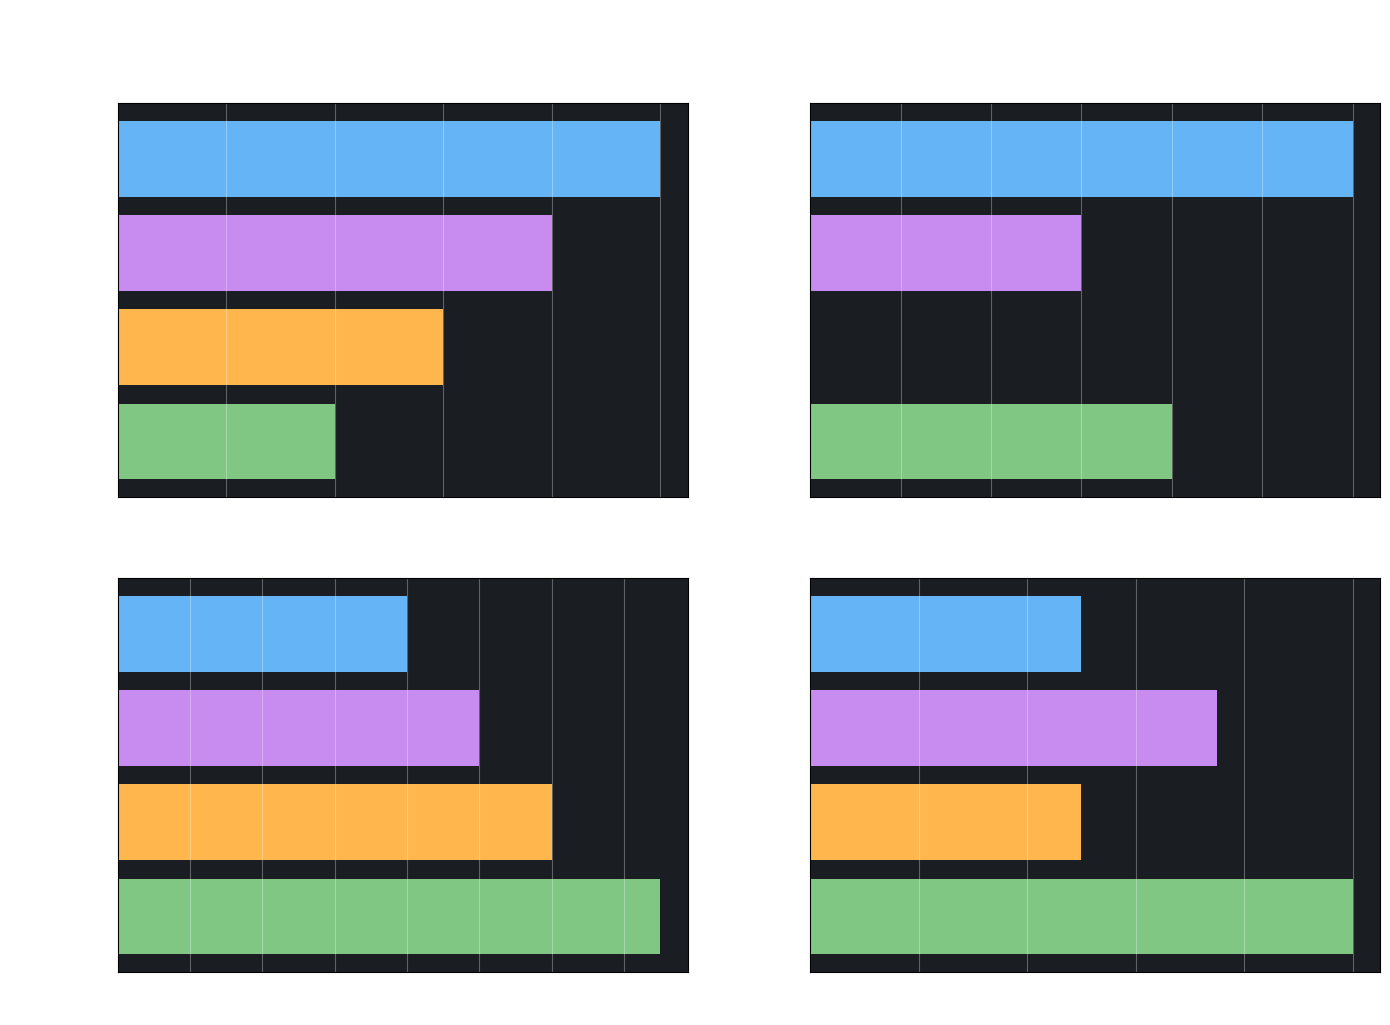


📊 Tower Strategy Guide:

Measurement Tower:
  Cost: $100
  Damage: 20 HP
  Range: 150 units
  Speed: 1.0 atk/sec
  Special: Collapses superposition

Phase Tower:
  Cost: $150
  Damage: 0 HP
  Range: 120 units
  Speed: 0.5 atk/sec
  Special: Shifts probabilities

Entanglement Tower:
  Cost: $200
  Damage: 15 HP
  Range: 100 units
  Speed: 0.75 atk/sec
  Special: Links enemies

Teleportation Tower:
  Cost: $250
  Damage: 30 HP
  Range: 80 units
  Speed: 0.5 atk/sec
  Special: Instant attack


In [7]:
# Tower statistics
tower_data = {
    'Measurement': {'cost': 100, 'damage': 20, 'range': 150, 'speed': 1.0, 'special': 'Collapses superposition'},
    'Phase': {'cost': 150, 'damage': 0, 'range': 120, 'speed': 0.5, 'special': 'Shifts probabilities'},
    'Entanglement': {'cost': 200, 'damage': 15, 'range': 100, 'speed': 0.75, 'special': 'Links enemies'},
    'Teleportation': {'cost': 250, 'damage': 30, 'range': 80, 'speed': 0.5, 'special': 'Instant attack'},
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

tower_names = list(tower_data.keys())
tower_colors = ['#81C784', '#FFB74D', '#C88BF0', '#64B4F6']

# Cost
costs = [tower_data[t]['cost'] for t in tower_names]
axes[0, 0].barh(tower_names, costs, color=tower_colors)
axes[0, 0].set_xlabel('Cost ($)', color='white')
axes[0, 0].set_title('Tower Cost', fontsize=14, color='white', fontweight='bold')
axes[0, 0].set_facecolor('#1a1d21')
axes[0, 0].tick_params(colors='white')
axes[0, 0].grid(axis='x', alpha=0.3, color='white')

# Damage
damages = [tower_data[t]['damage'] for t in tower_names]
axes[0, 1].barh(tower_names, damages, color=tower_colors)
axes[0, 1].set_xlabel('Damage', color='white')
axes[0, 1].set_title('Tower Damage', fontsize=14, color='white', fontweight='bold')
axes[0, 1].set_facecolor('#1a1d21')
axes[0, 1].tick_params(colors='white')
axes[0, 1].grid(axis='x', alpha=0.3, color='white')

# Range
ranges = [tower_data[t]['range'] for t in tower_names]
axes[1, 0].barh(tower_names, ranges, color=tower_colors)
axes[1, 0].set_xlabel('Range', color='white')
axes[1, 0].set_title('Tower Range', fontsize=14, color='white', fontweight='bold')
axes[1, 0].set_facecolor('#1a1d21')
axes[1, 0].tick_params(colors='white')
axes[1, 0].grid(axis='x', alpha=0.3, color='white')

# Attack Speed
speeds = [tower_data[t]['speed'] for t in tower_names]
axes[1, 1].barh(tower_names, speeds, color=tower_colors)
axes[1, 1].set_xlabel('Attack Speed (attacks/sec)', color='white')
axes[1, 1].set_title('Tower Attack Speed', fontsize=14, color='white', fontweight='bold')
axes[1, 1].set_facecolor('#1a1d21')
axes[1, 1].tick_params(colors='white')
axes[1, 1].grid(axis='x', alpha=0.3, color='white')

plt.suptitle('Tower Comparison', fontsize=16, color='white', fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n📊 Tower Strategy Guide:")
for name, data in tower_data.items():
    print(f"\n{name} Tower:")
    print(f"  Cost: ${data['cost']}")
    print(f"  Damage: {data['damage']} HP")
    print(f"  Range: {data['range']} units")
    print(f"  Speed: {data['speed']} atk/sec")
    print(f"  Special: {data['special']}")

## Summary

### 🎮 Interactive Demo Complete!

This notebook demonstrated:
1. ✅ Game board with 4 quantum paths
2. ✅ Enemy superposition visualization
3. ✅ Measurement and wave function collapse
4. ✅ Phase manipulation effects
5. ✅ Entangled enemy damage correlation
6. ✅ Tower statistics and comparisons

### 🚀 Ready to Play!
Run `python main.py` to play the full Pygame version with these quantum mechanics!

### 🎓 Educational Value
Players learn real quantum computing concepts:
- Superposition (Hadamard gates)
- Measurement (wave function collapse)
- Entanglement (Bell states)
- Phase rotation (interference)
- Quantum resource management (coherence)